In [2]:
# Starting Libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn import preprocessing as pre
import scipy.stats as stats
import pylab

In [3]:
# Importing data into dataframe
prepay_df = pd.read_csv('SF_2021_MI_Prepay.csv')
prepay_df.head()
# PREPAY_VOLUNTARY - Response Variable - 0: Did not Prepay 1: Did Prepay
# LOAN_IDENTIFIER
# UNEMPL_RATE - National Unemployment Rate Percentage
# HPI - Important indicator for estimating prepayments, defaults, and housing affordability.
# RATE_30YR - 30 Year Intrest Rate
# YIELD - The 10-year is used as a proxy for mortgage rates.
# ORIGINAL_INTEREST_RATE - The original interest rate on a mortgage loan as identified in the original mortgage note.
# PREV_MONTH_LOAN_FACTOR - With Prev_Loan_Factor we can see the unpaid principal balance just before prepayment.
# ORIGINAL_UPB - unpaid principal balance
# 

,PREPAY_VOLUNTARY,LOAN_IDENTIFIER,UNEMPL_RATE,HPI,RATE_30YR,YIELD,ORIGINAL_INTEREST_RATE,PREV_MONTH_LOAN_FACTOR,ORIGINAL_UPB,DTI,ORIGINAL_LTV,BORROWER_CREDIT_SCORE_AT_ORIGINATION,NUMBER_OF_BORROWERS,CHANNEL,PROPERTY_TYPE,OCCUPANCY_STATUS,ALTERNATIVE_DELINQUENCY_RESOLUTION,PROPERTY_VALUATION_METHOD
0,0,548942972133,3.7,367.26,3.098,1.47,0.06125,0.839261,152000.0,0.33,0.69,675.0,1.0,Retail,Single-family home,Principal,Appraisal,NaN
1,0,551308347809,3.7,367.26,3.098,1.47,0.05990,0.905107,115000.0,0.42,0.70,728.0,1.0,Correspondent,Single-family home,Principal,Appraisal,NaN
2,1,548723741884,5.7,334.33,3.060,1.64,0.06500,0.536282,46000.0,0.14,0.80,791.0,2.0,Retail,Single-family home,Investor,Appraisal,NaN
3,0,207792231451,3.7,367.26,3.098,1.47,0.04750,0.849335,154000.0,0.30,0.89,771.0,2.0,Correspondent,Condominium,Principal,Appraisal,NaN
4,0,207835001506,3.7,367.26,3.098,1.47,0.04500,0.834630,167000.0,0.40,0.95,801.0,1.0,Correspondent,Planned Urban Development,Principal,Appraisal,NaN


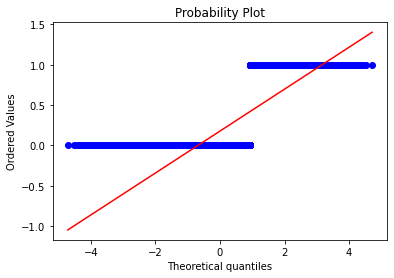

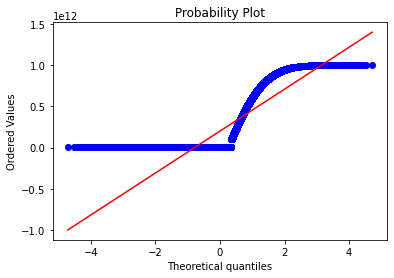

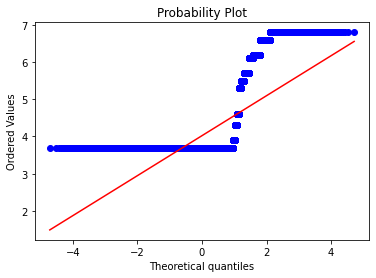

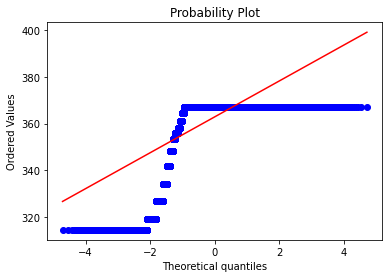

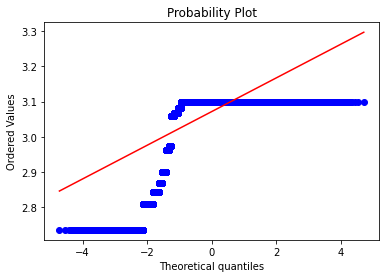

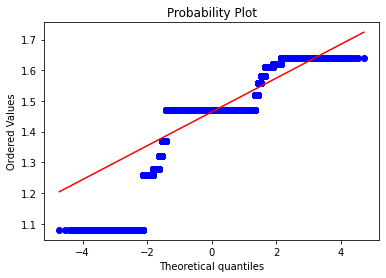

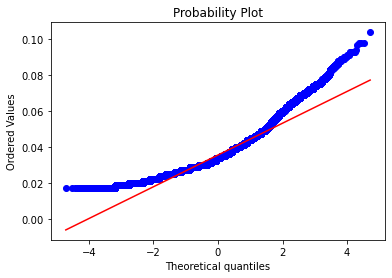

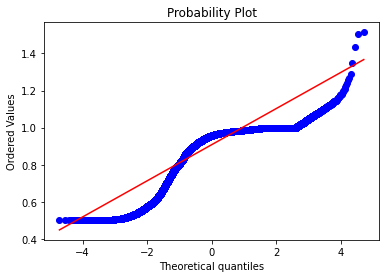

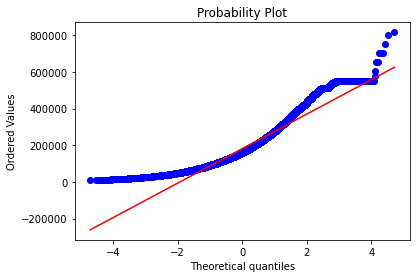

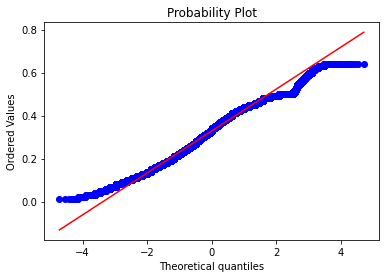

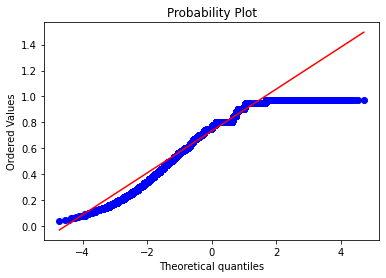

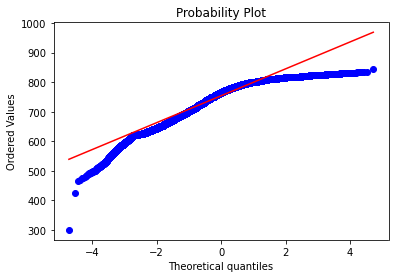

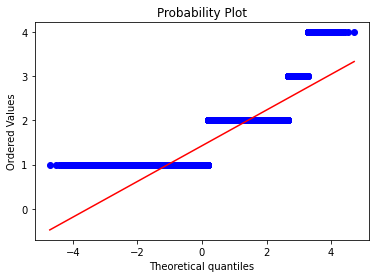

In [8]:
# Checking Normality (Not needed)
for i in range(prepay_df.shape[1]):  
    stats.probplot(prepay_df.iloc[:,i], dist="norm", plot=pylab)
    pylab.show()

In [4]:
# Droping column with too many NaN
prepay_df[prepay_df.isna().any(axis=1)]
prepay_df = prepay_df.drop(columns="PROPERTY_VALUATION_METHOD")

In [5]:
# Droping rows that have NaNs
len(prepay_df[prepay_df.isna().any(axis=1)])
prepay_df = prepay_df.dropna()

In [7]:
prepay_df.iloc[:,3:6]

,HPI,RATE_30YR,YIELD
0,367.26,3.098,1.47
1,367.26,3.098,1.47
2,334.33,3.060,1.64
3,367.26,3.098,1.47
4,367.26,3.098,1.47
...,...,...,...
576158,367.26,3.098,1.47
576159,367.26,3.098,1.47
576160,367.26,3.098,1.47
576161,367.26,3.098,1.47
